In [46]:
%pylab inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [47]:
def get_curve(ts):
    return np.cumprod(ts+1)
def plot(ts):
    plt.plot(get_curve(ts))

In [48]:
def get_portfolioTS(symbols, dir_):
    sers = pd.DataFrame()
    poss = pd.DataFrame()
    for symbol in symbols:
        path_ = '/'.join(('../data',dir_, symbol))
        data_ = pd.read_pickle(path_)
        ts_ = data_['stratret']
        pos_ = data_['pos']
        ts_ = ts_.dropna()
        sers[symbol] = ts_
        poss[symbol] = abs(pos_)
    return sers, poss

In [49]:
#variable: write the name of the directory here
dir_ = 'youngbuck'
leverage = 3

In [50]:
def get_wf_portfolio(dir_, step, lookback):
    symbols = os.listdir(dir_)
    start = 0
    end = step+lookback
    allsers = pd.Series()
    allposs = pd.Series()
    while True:
        print(1238-end)
        sers = pd.DataFrame()
        poss = pd.DataFrame()
        for symbol in symbols:
            ts = pd.read_pickle(''.join((dir_, symbol)))['2011 02':]['stratret']
            if len(ts) != 1238:
                continue
            ts = ts[start:end]
            pos = pd.read_pickle(''.join((dir_, symbol)))['2011 02':]['pos'][start:end]
            ts = ts.dropna()
            sers[symbol] = ts
            poss[symbol] = abs(pos)
        topn = list((sers[:lookback]+1).prod().sort_values(ascending=False)[:100].index)
        addser = sers[topn][lookback:].sum(axis = 1)
        addpos = poss[topn][lookback:].sum(axis = 1)
        allsers = pd.concat([allsers,addser])
        allposs = pd.concat([allposs, addpos])
        start +=step
        end+=step
        if end>1238:
            break
    return allsers, allposs

In [51]:
s,p = get_wf_portfolio('../data/youngbuck/', 60, 180)

998
938
878
818
758
698
638
578
518
458
398
338
278
218
158
98
38


# Fully Allocated
I divide daily return by the number of positions on to get an estimate of the equity curve based on full capital allocation. I do not include leverage.

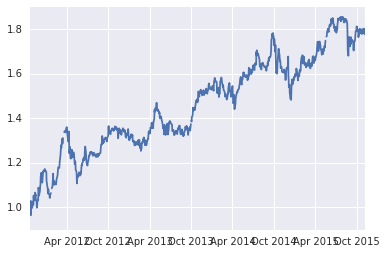

In [52]:
#90 210
plot(s/p)

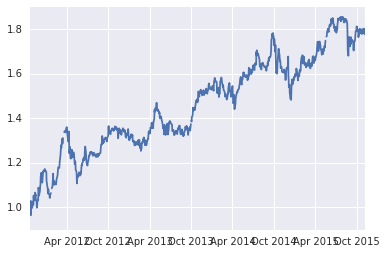

In [53]:
#60 180 #250
plot(s/p)

In [54]:
import pyfolio as pf

In [55]:
sd = np.std(s/p)*252**.5
ret = np.prod(s/p+1)**(1/5)-1
ret/sd


0.70476029470062418

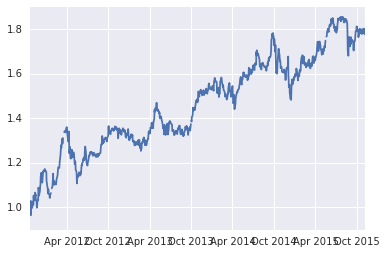

In [56]:
#60 180 #100 #20
plot(s/p)

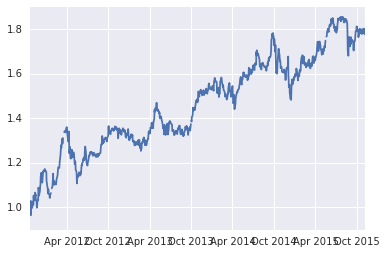

In [57]:
#60 180 #100
plot(s/p)

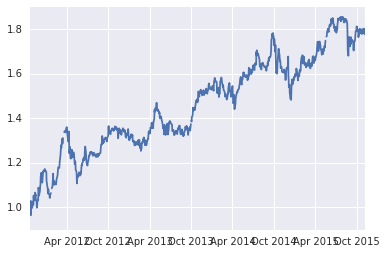

In [58]:
#60 180
plot(s/p)

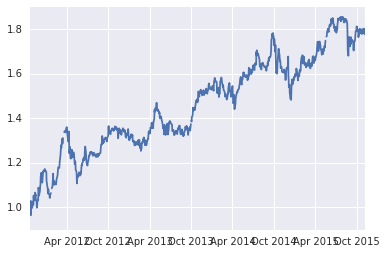

In [59]:
plot(s/p)

# Equal Division
I divide the return by the total number of symbols that I am trading (selected N based on recent performance). I include 3x leverage in these equity curves

The total allocation and equal division represent extremes of capital allocation. The realistic amount will be somewhere between the two. Interestingly enough, they have roughly the same return over several years.

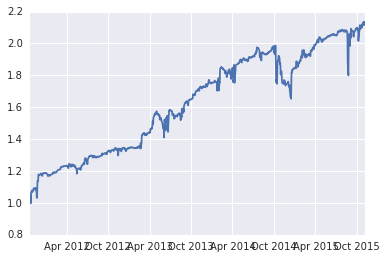

In [60]:
#90
plot(s*3/50)

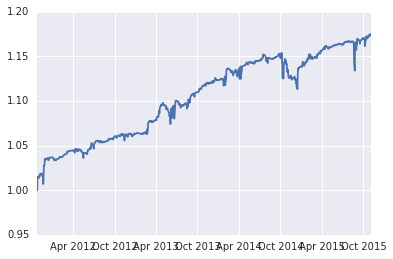

In [61]:
#60 250
plot(s*3/250)

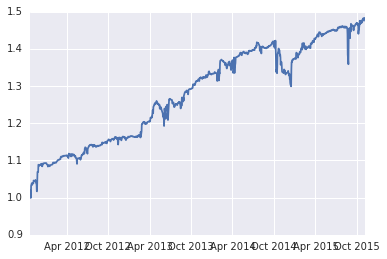

In [62]:
#60 100
plot(s*3/100)

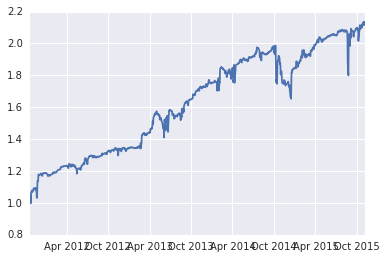

In [63]:
#60
plot(s*3/50)

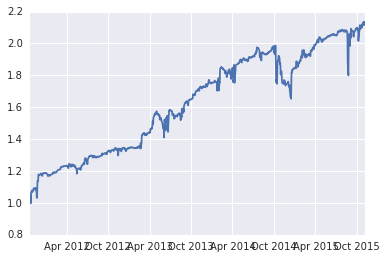

In [64]:
plot(s*3/50)

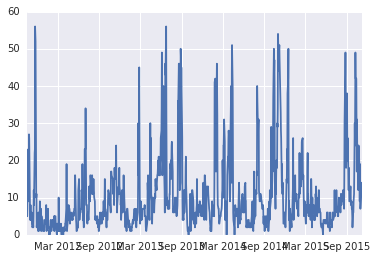

In [65]:
plt.plot(p)

# Conclusions
It seems that a three month step with a nine month lookback is ideal for this trade. Around 100 symbols should be selected, certainly more than 50 and less than 250.

The capital allocation plots are also revealing. The fully allocated plot shows almost 100% return over 5 years with reasonably low volatilty (no leverage!). The equally divided capital shows even lower volatility with lower return. Depending on leverage, the ideal allocation is somewhere between the two. 

In [66]:
ret2 = s/50*3
ret2 = ret2.tz_localize('UTC')

ret=s/p
ret = ret.tz_localize('UTC')

Entire data start date: 2011-10-24
Entire data end date: 2015-11-05


Backtest Months: 48
                   Backtest
annual_return          0.20
annual_volatility      0.17
sharpe_ratio           1.17
calmar_ratio           1.21
stability              0.94
max_drawdown          -0.17
omega_ratio            1.35
sortino_ratio          2.02
skewness               1.97
kurtosis              22.52
information_ratio      0.01
alpha                  0.20
beta                   0.01

Worst Drawdown Periods
   net drawdown in %  peak date valley date recovery date duration
0              16.81 2014-10-07  2014-12-15    2015-03-27      124
1              13.74 2015-07-30  2015-08-24    2015-09-04       27
2              10.46 2013-05-02  2013-06-04    2013-06-26       40
3               6.01 2014-04-08  2014-04-10    2014-04-17        8
4               5.22 2014-02-11  2014-04-04    2014-04-08       41



/home/ubuntu/anaconda3/lib/python3.5/site-packages/pyfolio/plotting.py:1356: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  print(drawdown_df.sort('net drawdown in %', ascending=False))
/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))



2-sigma returns daily    -0.021
2-sigma returns weekly   -0.040
dtype: float64


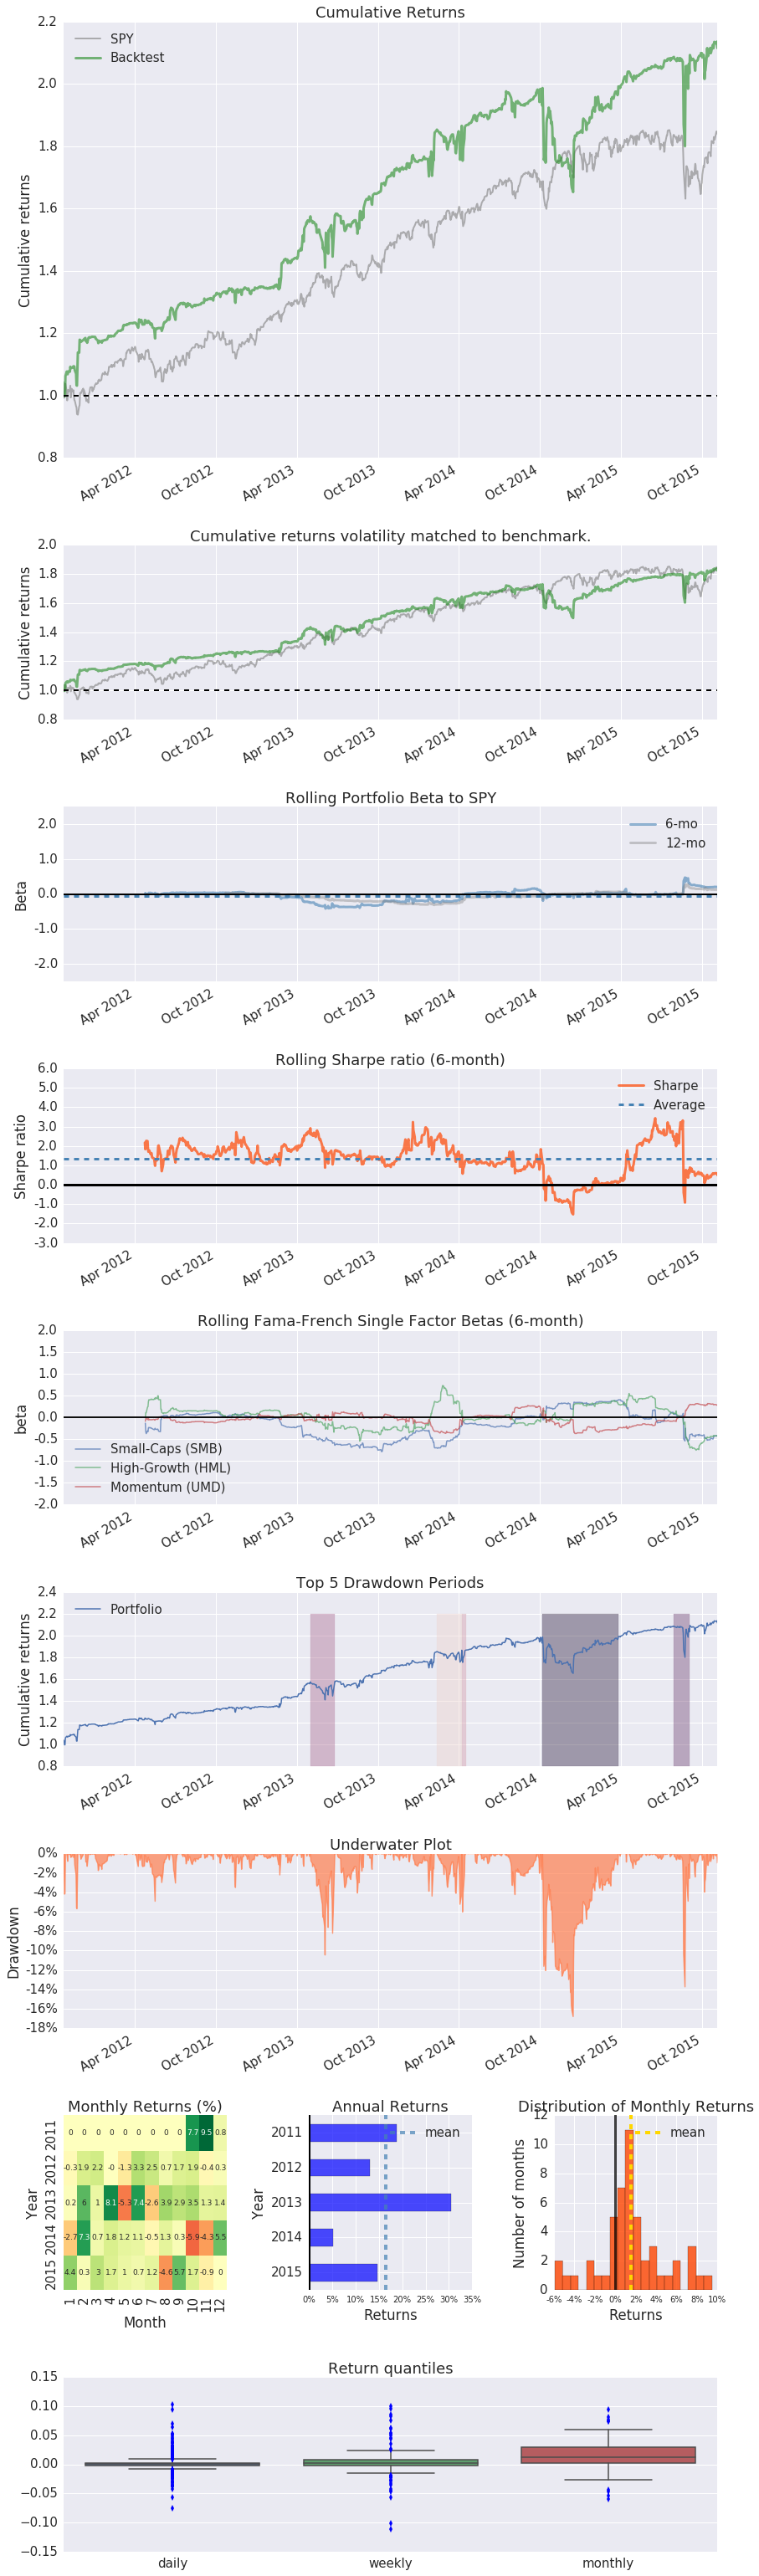


Stress Events
               mean    min    max
EZB IR Event  0.001 -0.004  0.010
Apr14         0.001 -0.037  0.052
Oct14        -0.002 -0.056  0.045
Fall2015      0.001 -0.076  0.095
Recovery      0.001 -0.035  0.103
New Normal    0.001 -0.076  0.095


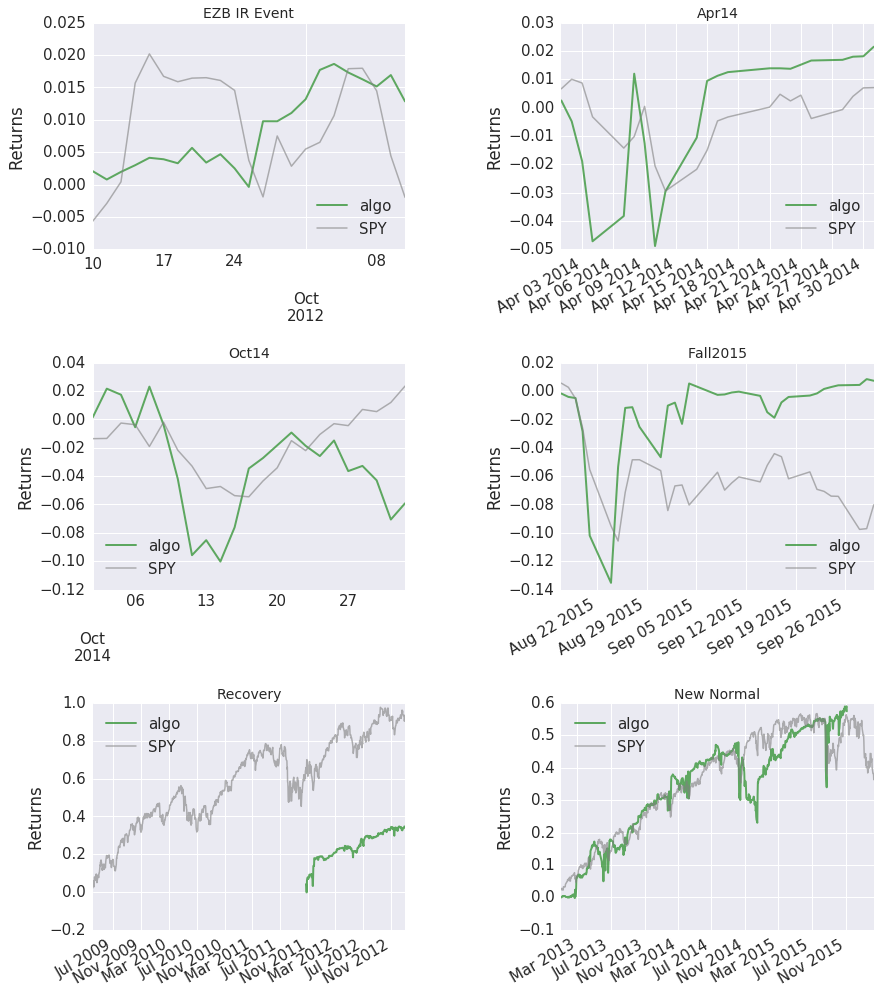

In [67]:
pf.create_full_tear_sheet(ret2)

Entire data start date: 2011-10-18
Entire data end date: 2015-11-05


Backtest Months: 48
                   Backtest
annual_return          0.15
annual_volatility      0.17
sharpe_ratio           0.92
calmar_ratio           0.82
stability               NaN
max_drawdown          -0.19
omega_ratio            1.17
sortino_ratio          1.33
skewness                NaN
kurtosis                NaN
information_ratio      0.00
alpha                   NaN
beta                    NaN

Worst Drawdown Periods
   net drawdown in %  peak date valley date recovery date duration
0                  0 2011-10-18  2011-10-18    2011-10-18        1
1                  0 2011-10-18  2011-10-18    2011-10-18        1
2                  0 2011-10-18  2011-10-18    2011-10-18        1
3                  0 2011-10-18  2011-10-18    2011-10-18        1
4                  0 2011-10-18  2011-10-18    2011-10-18        1



/home/ubuntu/anaconda3/lib/python3.5/site-packages/pyfolio/plotting.py:1356: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  print(drawdown_df.sort('net drawdown in %', ascending=False))
/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))



2-sigma returns daily    -0.021
2-sigma returns weekly   -0.042
dtype: float64


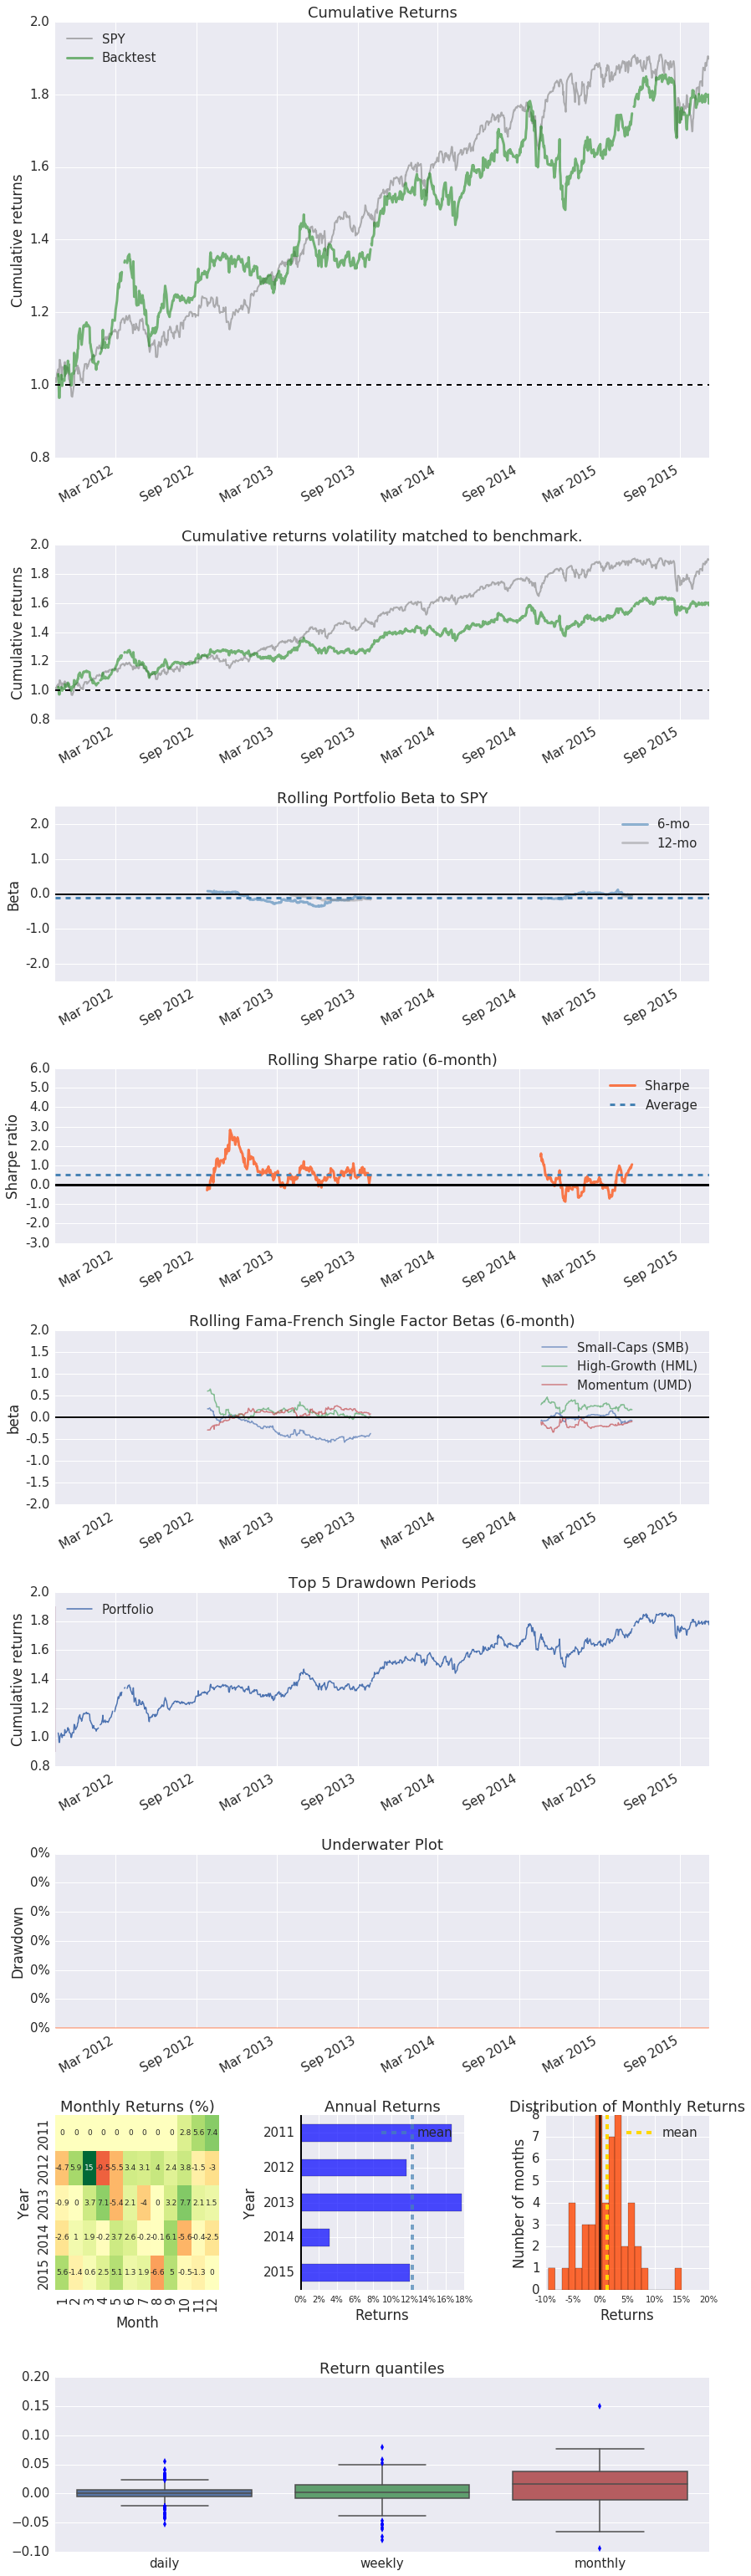


Stress Events
               mean    min    max
EZB IR Event  0.002 -0.011  0.025
Apr14         0.000 -0.029  0.022
Oct14        -0.002 -0.026  0.022
Fall2015     -0.000 -0.042  0.032
Recovery      0.001 -0.043  0.055
New Normal    0.000 -0.052  0.035


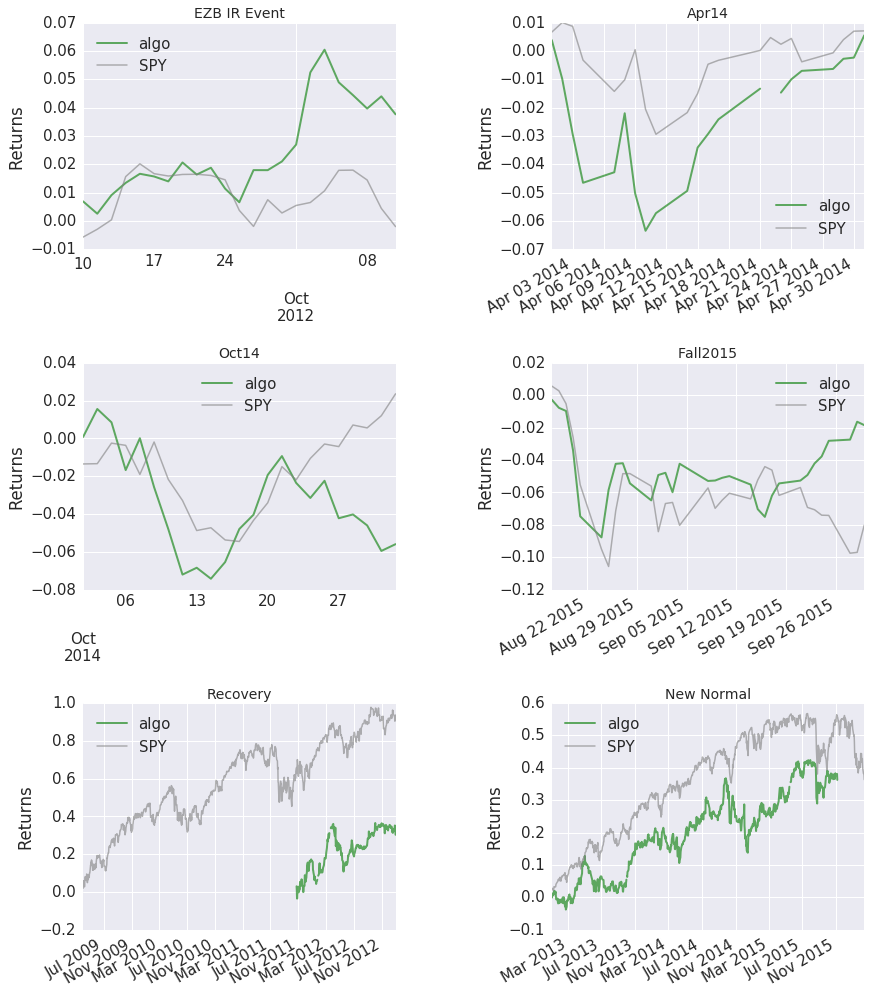

In [68]:
pf.create_full_tear_sheet(ret)

In [73]:
corr(s,p)

NameError: name 'corr' is not defined

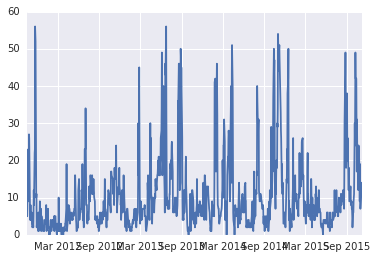

In [72]:
plt.plot(p)

In [74]:
import scipy

In [75]:
scipy.pearsonr(s,p)

AttributeError: module 'scipy' has no attribute 'pearsonr'

In [78]:
from scipy.stats.stats import pearsonr


In [79]:
pearsonr(s,p)

ValueError: operands could not be broadcast together with shapes (1016,) (1020,) 

In [81]:
p

Date
2011-10-18    12
2011-10-19     5
2011-10-20     7
2011-10-21    15
2011-10-24    23
2011-10-25     9
2011-10-26    12
2011-10-27    27
2011-10-28    26
2011-10-31    10
2011-11-01     4
2011-11-02     5
2011-11-03     8
2011-11-04     4
2011-11-07     4
2011-11-08     6
2011-11-09     3
2011-11-10     3
2011-11-11     2
2011-11-14     3
2011-11-15     2
2011-11-16     5
2011-11-17    12
2011-11-18     8
2011-11-21    22
2011-11-22    23
2011-11-23    56
2011-11-25    52
2011-11-28    10
2011-11-29    11
              ..
2015-09-25     2
2015-09-28     6
2015-09-29     6
2015-09-30     9
2015-10-01    10
2015-10-02    11
2015-10-05    30
2015-10-06    24
2015-10-07    36
2015-10-08    49
2015-10-09    42
2015-10-12    42
2015-10-13    27
2015-10-14    17
2015-10-15    31
2015-10-16    24
2015-10-19    24
2015-10-20    21
2015-10-21    12
2015-10-22    24
2015-10-23    23
2015-10-26    18
2015-10-27     9
2015-10-28    19
2015-10-29    10
2015-10-30     7
2015-11-02    10
2015-11-0

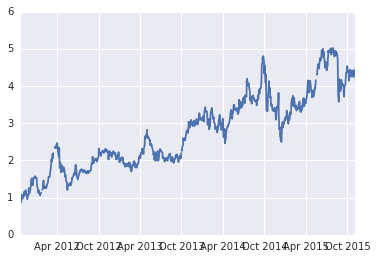

In [87]:
plot(s*3.3/p)

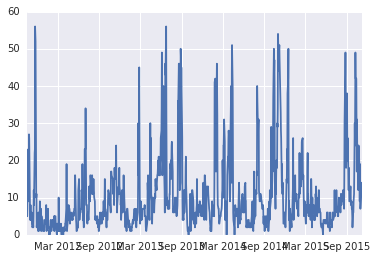

In [89]:
plt.plot(p)

In [ ]:
s